In [1]:
from pathlib import Path      # handle folders and file paths
import pandas as pd           # work with tabular data
import matplotlib.pyplot as plt  # simple plotting

# Set the base directory to the project root
BASE_DIR = Path("..")  # ".." means: go one level up from /notebooks

# Define the raw and processed data folders
DATA_RAW = BASE_DIR / "data_raw"          # where original CSV files live
DATA_PROCESSED = BASE_DIR / "data_processed"  # where cleaned data will go

print("BASE_DIR:", BASE_DIR)
print("DATA_RAW exists:", DATA_RAW.exists())
print("DATA_PROCESSED exists:", DATA_PROCESSED.exists())


BASE_DIR: ..
DATA_RAW exists: True
DATA_PROCESSED exists: True


In [2]:
orders_path = DATA_RAW / "orders.csv"  # full path to orders CSV file

print("Orders file path:", orders_path)
print("Orders file exists:", orders_path.exists())

# Read only a sample of the file first to avoid memory issues
orders_sample = pd.read_csv(orders_path, nrows=5)  # read first 5 rows only

orders_sample


Orders file path: ../data_raw/orders.csv
Orders file exists: True


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
# Load more rows to understand schema without loading everything
orders_preview = pd.read_csv(orders_path, nrows=1000)  # read first 1000 rows

# Show columns and basic info
print("Columns:", list(orders_preview.columns))
print("\nDataFrame info:")
orders_preview.info()


Columns: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1000 non-null   int64  
 1   user_id                 1000 non-null   int64  
 2   eval_set                1000 non-null   object 
 3   order_number            1000 non-null   int64  
 4   order_dow               1000 non-null   int64  
 5   order_hour_of_day       1000 non-null   int64  
 6   days_since_prior_order  936 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 54.8+ KB


In [4]:
# Path to the order_products__prior file
op_prior_path = DATA_RAW / "order_products__prior.csv"  # build full path

print("Prior order lines file path:", op_prior_path)
print("File exists:", op_prior_path.exists())

# Read only a small sample to inspect the structure
op_prior_sample = pd.read_csv(op_prior_path, nrows=5)  # first 5 rows

op_prior_sample


Prior order lines file path: ../data_raw/order_products__prior.csv
File exists: True


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
# Load a slightly larger sample to understand schema better
op_prior_preview = pd.read_csv(op_prior_path, nrows=1000)  # first 1000 rows

print("Columns:", list(op_prior_preview.columns))
print("\nDataFrame info:")
op_prior_preview.info()


Columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   order_id           1000 non-null   int64
 1   product_id         1000 non-null   int64
 2   add_to_cart_order  1000 non-null   int64
 3   reordered          1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [6]:
# Path to products file
products_path = DATA_RAW / "products.csv"

print("Products file path:", products_path)
print("File exists:", products_path.exists())

# Load small sample
products_sample = pd.read_csv(products_path, nrows=5)
products_sample


Products file path: ../data_raw/products.csv
File exists: True


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
# Path to aisles file
aisles_path = DATA_RAW / "aisles.csv"

print("Aisles file path:", aisles_path)
print("File exists:", aisles_path.exists())

# Load sample
aisles_sample = pd.read_csv(aisles_path, nrows=5)
aisles_sample


Aisles file path: ../data_raw/aisles.csv
File exists: True


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
# Path to departments file
departments_path = DATA_RAW / "departments.csv"

print("Departments file path:", departments_path)
print("File exists:", departments_path.exists())

# Sample
departments_sample = pd.read_csv(departments_path, nrows=5)
departments_sample


Departments file path: ../data_raw/departments.csv
File exists: True


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# Load the full product table
products = pd.read_csv(products_path)

# Load full aisle table
aisles = pd.read_csv(aisles_path)

# Load full department table
departments = pd.read_csv(departments_path)

print(products.shape, aisles.shape, departments.shape)


(49688, 4) (134, 2) (21, 2)


In [10]:
# Merge products with aisle names
products_aisles = products.merge(
    aisles,
    on="aisle_id",      # column used to connect products → aisles
    how="left"          # keep all products even if aisle is missing
)

products_aisles.head()


,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation


In [11]:
# Merge the above with departments to add department names
products_full = products_aisles.merge(
    departments,
    on="department_id",   # connect aisle → department
    how="left"
)

products_full.head()


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [12]:
print("products_full shape:", products_full.shape)
products_full.info()


products_full shape: (49688, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [13]:
products_full["aisle"].value_counts().head()


aisle
missing                 1258
candy chocolate         1246
ice cream ice           1091
vitamins supplements    1038
yogurt                  1026
Name: count, dtype: int64

In [14]:
products_full["department"].value_counts()


department
personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: count, dtype: int64

In [15]:
output_path = DATA_PROCESSED / "products_full.csv"
products_full.to_csv(output_path, index=False)

print("Saved:", output_path)


Saved: ../data_processed/products_full.csv


In [16]:
# Load full versions (not sample)
orders = pd.read_csv(orders_path)
order_products_prior = pd.read_csv(op_prior_path)
products_full = pd.read_csv(DATA_PROCESSED / "products_full.csv")


In [17]:
# Add a unit quantity column
order_products_prior["line_qty"] = 1


In [18]:
# Merge prior order lines with product dimension
order_lines = order_products_prior.merge(
    products_full,
    on="product_id",
    how="left"
)

order_lines.head()


,order_id,product_id,add_to_cart_order,reordered,line_qty,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,1,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,1,Natural Sweetener,17,13,baking ingredients,pantry


In [19]:
# Merge with orders to add user & order time info
order_lines_full = order_lines.merge(
    orders,
    on="order_id",
    how="left"
)

order_lines_full.head()


,order_id,product_id,add_to_cart_order,reordered,line_qty,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,1,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,1,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [20]:
print("Shape of order_lines_full:", order_lines_full.shape)
order_lines_full.info()


Shape of order_lines_full: (32434489, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   line_qty                int64  
 5   product_name            object 
 6   aisle_id                int64  
 7   department_id           int64  
 8   aisle                   object 
 9   department              object 
 10  user_id                 int64  
 11  eval_set                object 
 12  order_number            int64  
 13  order_dow               int64  
 14  order_hour_of_day       int64  
 15  days_since_prior_order  float64
dtypes: float64(1), int64(11), object(4)
memory usage: 3.9+ GB


In [21]:
fact_path = DATA_PROCESSED / "order_lines_full.csv"
order_lines_full.to_csv(fact_path, index=False)

print("Saved:", fact_path)


Saved: ../data_processed/order_lines_full.csv


In [22]:
def assign_segment(row):
    """
    Assign each product line into one of Mars NZ's business segments:
    Snacking, Pet, Food, or Other.
    
    We detect segments based on department + aisle names.
    This mimics how FMCG category teams classify items.
    """
    
    dept = str(row["department"]).lower()   # normalize
    aisle = str(row["aisle"]).lower()
    
    # --- PET ---
    # If department or aisle contains the word "pet"
    if "pet" in dept or "pet" in aisle:
        return "Pet"
    
    # --- SNACKING ---
    snack_keywords = ["snack", "chips", "candy", "chocolate", "popcorn"]
    if any(k in dept for k in snack_keywords) or any(k in aisle for k in snack_keywords):
        return "Snacking"
    
    # --- FOOD ---
    food_keywords = [
        "grocery", "dairy", "frozen", "bakery", "breakfast",
        "meat", "seafood", "pasta", "produce", "canned", "international"
    ]
    if any(k in dept for k in food_keywords) or any(k in aisle for k in food_keywords):
        return "Food"
    
    # --- OTHER ---
    return "Other"


In [23]:
# Apply segment classification
order_lines_full["segment"] = order_lines_full.apply(assign_segment, axis=1)

# Quick distribution check
order_lines_full["segment"].value_counts(normalize=True)


segment
Food        0.688202
Other       0.213758
Snacking    0.089027
Pet         0.009012
Name: proportion, dtype: float64

In [24]:
segmented_path = DATA_PROCESSED / "order_lines_full_segmented.csv"
order_lines_full.to_csv(segmented_path, index=False)

print("Saved:", segmented_path)


Saved: ../data_processed/order_lines_full_segmented.csv


In [25]:
# Load the segmented fact table
segmented_path = DATA_PROCESSED / "order_lines_full_segmented.csv"
order_lines_full = pd.read_csv(segmented_path)

order_lines_full.head()


,order_id,product_id,add_to_cart_order,reordered,line_qty,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,segment
0,2,33120,1,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,Food
1,2,28985,2,1,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,Food
2,2,9327,3,0,1,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,Other
3,2,45918,4,1,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,Other
4,2,30035,5,0,1,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0,Other


In [26]:
# Group by segment and count total units
segment_kpis = (
    order_lines_full
    .groupby("segment")
    .agg(
        total_units=("line_qty", "sum")    # sum of units for each segment
    )
    .reset_index()
)

segment_kpis


,segment,total_units
0,Food,22321496
1,Other,6933137
2,Pet,292306
3,Snacking,2887550


In [27]:
# Sort segments by total units (descending)
segment_kpis = segment_kpis.sort_values("total_units", ascending=False)
segment_kpis


,segment,total_units
0,Food,22321496
1,Other,6933137
3,Snacking,2887550
2,Pet,292306


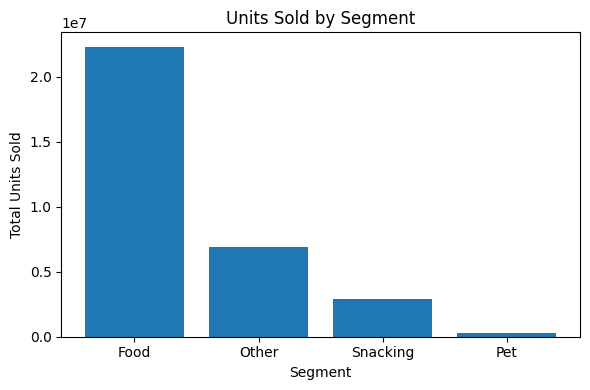

In [28]:
plt.figure(figsize=(6,4))  # set figure size

plt.bar(segment_kpis["segment"], segment_kpis["total_units"])  # bar chart

plt.title("Units Sold by Segment")        # chart title
plt.xlabel("Segment")                     # x-axis label
plt.ylabel("Total Units Sold")            # y-axis label

plt.tight_layout()                        # avoid overlapping labels
plt.show()                                # display


In [29]:
# For each order, find the unique segments present
order_segment_flags = (
    order_lines_full
    .groupby(["order_id", "segment"])
    .size()
    .unstack(fill_value=0)   # convert segments to columns
)

order_segment_flags.head()


segment,Food,Other,Pet,Snacking
order_id,,,,
2,4,5,0,0
3,8,0,0,0
4,5,4,0,4
5,14,8,0,4
6,0,3,0,0


In [30]:
# Convert counts > 0 to 1 (meaning: segment is present in the order)
order_segment_flags_binary = (order_segment_flags > 0).astype(int)

order_segment_flags_binary.head()


segment,Food,Other,Pet,Snacking
order_id,,,,
2,1,1,0,0
3,1,0,0,0
4,1,1,0,1
5,1,1,0,1
6,0,1,0,0


In [31]:
# Count how many orders contain each segment
penetration = order_segment_flags_binary.mean().reset_index()
penetration.columns = ["segment", "basket_penetration"]

penetration



,segment,basket_penetration
0,Food,0.934491
1,Other,0.745906
2,Pet,0.068681
3,Snacking,0.432815


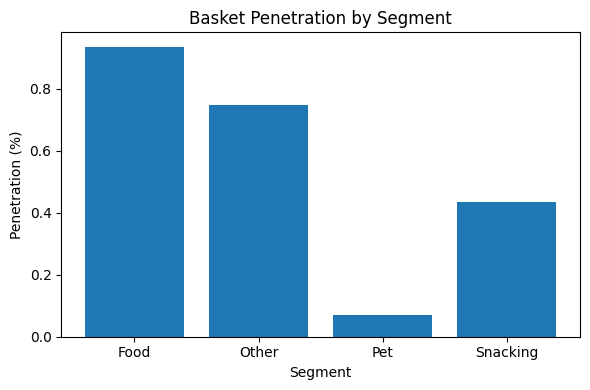

In [32]:
plt.figure(figsize=(6,4))

plt.bar(penetration["segment"], penetration["basket_penetration"])

plt.title("Basket Penetration by Segment")
plt.ylabel("Penetration (%)")
plt.xlabel("Segment")

plt.tight_layout()
plt.show()


In [33]:
penetration["basket_penetration_percent"] = penetration["basket_penetration"] * 100
penetration


,segment,basket_penetration,basket_penetration_percent
0,Food,0.934491,93.449137
1,Other,0.745906,74.590575
2,Pet,0.068681,6.868139
3,Snacking,0.432815,43.281541


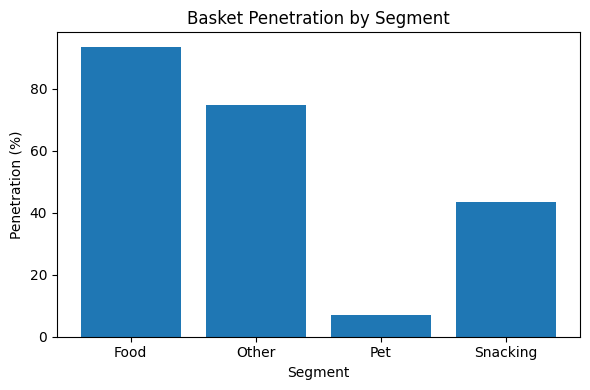

In [34]:
plt.figure(figsize=(6,4))

plt.bar(penetration["segment"], penetration["basket_penetration_percent"])

plt.title("Basket Penetration by Segment")
plt.ylabel("Penetration (%)")
plt.xlabel("Segment")

plt.tight_layout()
plt.show()


In [35]:
# Group by hour of day and segment
hour_segment_kpis = (
    order_lines_full
    .groupby(["order_hour_of_day", "segment"])
    .agg(total_units=("line_qty", "sum"))
    .reset_index()
)

hour_segment_kpis.head()



,order_hour_of_day,segment,total_units
0,0,Food,152873
1,0,Other,46339
2,0,Pet,1960
3,0,Snacking,17776
4,1,Food,79713


In [36]:
hour_segment_matrix = hour_segment_kpis.pivot(
    index="order_hour_of_day",
    columns="segment",
    values="total_units"
).fillna(0)

hour_segment_matrix.head()


segment,Food,Other,Pet,Snacking
order_hour_of_day,,,,
0,152873,46339,1960,17776
1,79713,25795,1124,9154
2,47230,15886,676,5642
3,34665,11864,600,4192
4,36192,12477,621,3993


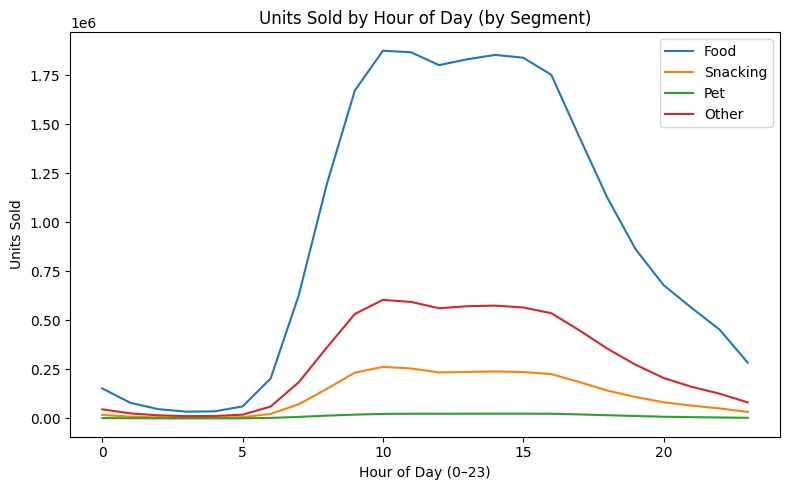

In [37]:
plt.figure(figsize=(8,5))

plt.plot(hour_segment_matrix.index, hour_segment_matrix["Food"], label="Food")
plt.plot(hour_segment_matrix.index, hour_segment_matrix["Snacking"], label="Snacking")
plt.plot(hour_segment_matrix.index, hour_segment_matrix["Pet"], label="Pet")
plt.plot(hour_segment_matrix.index, hour_segment_matrix["Other"], label="Other")

plt.title("Units Sold by Hour of Day (by Segment)")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Units Sold")
plt.legend()

plt.tight_layout()
plt.show()


In [38]:
# Calculate reorder rate per segment
reorder_kpis = (
    order_lines_full
    .groupby("segment")
    .agg(
        reorder_rate=("reordered", "mean")   # fraction of lines that are reorders
    )
    .reset_index()
)

reorder_kpis


,segment,reorder_rate
0,Food,0.616474
1,Other,0.511590
2,Pet,0.550875
3,Snacking,0.574180


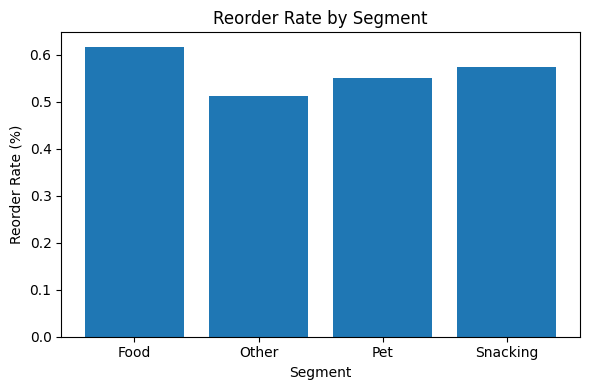

In [39]:
plt.figure(figsize=(6,4))

plt.bar(reorder_kpis["segment"], reorder_kpis["reorder_rate"])

plt.title("Reorder Rate by Segment")
plt.xlabel("Segment")
plt.ylabel("Reorder Rate (%)")

plt.tight_layout()
plt.show()


In [40]:
# For each customer and segment, count how many times they bought that segment
customer_segment_counts = (
    order_lines_full
    .groupby(["user_id", "segment"])
    .size()
    .reset_index(name="times_bought")
)

customer_segment_counts.head()


,user_id,segment,times_bought
0,1,Food,21
1,1,Other,16
2,1,Snacking,22
3,2,Food,122
4,2,Other,31


In [41]:
# Loyal = bought segment >= 2 times
customer_loyalty = (
    customer_segment_counts
    .assign(loyal=lambda df: (df["times_bought"] >= 2).astype(int))
    .groupby("segment")
    .agg(
        loyal_customers=("loyal", "sum"),
        total_customers=("loyal", "count")
    )
)

customer_loyalty["loyalty_rate"] = customer_loyalty["loyal_customers"] / customer_loyalty["total_customers"]
customer_loyalty


,loyal_customers,total_customers,loyalty_rate
segment,,,
Food,202315,203789,0.992767
Other,195753,201140,0.973218
Pet,38758,59584,0.650477
Snacking,154773,174219,0.888382


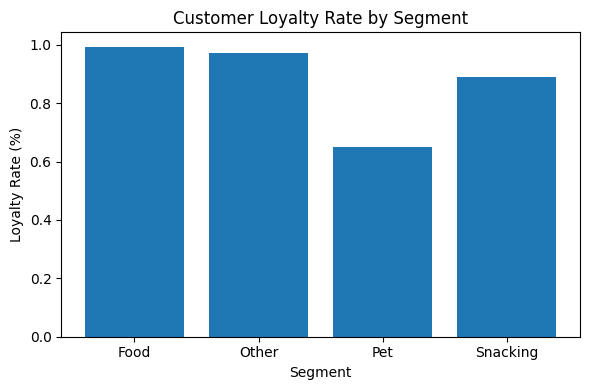

In [42]:
plt.figure(figsize=(6,4))

plt.bar(customer_loyalty.index, customer_loyalty["loyalty_rate"])

plt.title("Customer Loyalty Rate by Segment")
plt.xlabel("Segment")
plt.ylabel("Loyalty Rate (%)")

plt.tight_layout()
plt.show()
